In [1]:
import tensorflow as tf
print(tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

2025-09-02 17:34:00.653488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.20.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# MNIST data load

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(-1,28,28,1)/255.0
X_test = X_test.reshape(-1,28,28,1)/255.0
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
from tensorflow.keras import Sequential, layers
model = Sequential(
    [
        layers.Input(shape=(28,28,1)), # 3차원 이미지 1장의 입력
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(), # default(2,2)
        layers.Dropout(0.1),
        
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'), # 분류계층
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax') # 출력 계층
    ]
)

I0000 00:00:1756802058.436641   92235 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# 모델 학습
model.fit(X_train, y_train, batch_size=128, epochs=30, verbose=1)

Epoch 1/30


2025-09-02 17:34:30.691601: I external/local_xla/xla/service/service.cc:163] XLA service 0x71851c0059f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-02 17:34:30.691628: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-02 17:34:30.712232: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-02 17:34:30.828210: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200


 52/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4088 - loss: 1.7360

I0000 00:00:1756802072.537455   92384 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8968 - loss: 0.3304
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9653 - loss: 0.1169
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9744 - loss: 0.0849
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9790 - loss: 0.0696
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9815 - loss: 0.0621
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9829 - loss: 0.0561
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9852 - loss: 0.0484
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9855 - loss: 0.0459
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9874 - loss: 0.0413
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9880 - loss: 0.0389
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9883 - loss: 0.0369
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy

In [10]:
model.evaluate(X_test, y_test, verbose=0)

2025-09-02 17:35:28.555648: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_93', 20 bytes spill stores, 20 bytes spill loads



[0.023658646270632744, 0.9937000274658203]

In [11]:
# RESNET 활용하기

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions
import numpy as np

model = ResNet50(weights='imagenet') # 첫 실행 시 가중치 다운로드됨

# https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg
img = image.load_img('YellowLabradorLooking_new.jpg',target_size=(224, 224))
x = image.img_to_array(img) # x.shape=(224,224,3)
x = np.expand_dims(x, axis=0) # x.shape=(1,244,244,3)
pred = model.predict(x, verbose=0)
print('Predicted:', decode_predictions(pred, top=3))

Predicted: [[('n02099712', 'Labrador_retriever', np.float32(0.26892528)), ('n02108089', 'boxer', np.float32(0.15150161)), ('n02099849', 'Chesapeake_Bay_retriever', np.float32(0.10756052))]]


In [14]:
# 전이학습 : 출력층을 바꾼다
# include_top = False
# trainable = True

# 분류모델 추가하기

In [15]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
resnet_model = ResNet50(input_shape=(224,224,3), include_top=False)
resnet_model.trainable = True
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,352,259 (482.00 MB)

 Trainable params: 126,299,139 (481.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [16]:
import zipfile
file_path = 'glaucoma.zip'
with zipfile.ZipFile(file_path, 'r') as f:
    f.extractall('./datasets/')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.2, height_shift_range=0.2,
                               horizontal_flip=True)
train_data = train_gen.flow_from_directory('./datasets/glaucoma/train', target_size=(224,224),
                                           batch_size=32, class_mode='sparse')

test_gen = ImageDataGenerator()
test_data = test_gen.flow_from_directory('./datasets/glaucoma/test', target_size=(224,224),
                                         batch_size=32, class_mode='sparse')

Found 1394 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(train_data, validation_data=test_data, epochs=20)

/home/devuser/miniconda3/envs/tf_cuda_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/44 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.5404 - loss: 45.5016

2025-09-02 17:38:01.385548: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16168', 4 bytes spill stores, 4 bytes spill loads

2025-09-02 17:38:01.731813: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_16038', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.5653 - loss: 37.9878

/home/devuser/miniconda3/envs/tf_cuda_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-09-02 17:38:20.232847: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1712', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 716ms/step - accuracy: 0.6492 - loss: 13.6716 - val_accuracy: 0.5000 - val_loss: 12.9541
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7288 - loss: 0.6411 - val_accuracy: 0.5333 - val_loss: 2.8877
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.7403 - loss: 0.6073 - val_accuracy: 0.5733 - val_loss: 1.6407
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7676 - loss: 0.5507 - val_accuracy: 0.6667 - val_loss: 0.9996
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7740 - loss: 0.5196 - val_accuracy: 0.6800 - val_loss: 0.8142
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 210ms/step - accuracy: 0.7690 - loss: 0.5362 - val_accuracy: 0.7467 - val_loss: 0.5434
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.7812 - loss: 0.5382 - val_accuracy: 0.6467 - val_loss: 0.7031
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.7999 - loss: 0.4707 - val_accuracy: 0.6667 - v

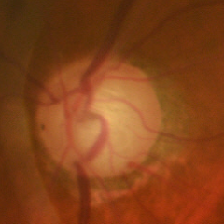

In [67]:
# 테스트 데이터 로드
from tensorflow.keras.preprocessing import image

img = image.load_img('test.png', target_size=(224,224))
img

In [ ]:
import numpy as np
from tensorflow.keras.applications.resnet50 import decode_predictions

x = image.img_to_array(img).reshape(-1, 224, 224, 3)
# x = np.expand_dims(x, axis=0)
pred = model.predict(x, verbose=0)
pred

array([[0.7134494, 0.1755555, 0.1109951]], dtype=float32)